# Big Mart Sales Prediction

##### Reading and Understanding the Data

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading the dataset
df = pd.read_csv('train.csv')

In [3]:
# Checking the head of the dataset
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
# Checking the Shape of Dataset
df.shape

(8523, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


#### Cleaning the Dataset

In [6]:
# Since there are null values present in `Item_Weight` and `Outlet_Size` and so imputing missing values for Item_Weight with the mean

mean_item_weight = df['Item_Weight'].mean()
df['Item_Weight'].fillna(mean_item_weight, inplace=True)

In [7]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [8]:
# Imputing the missing values for Outlet_Size with the mode

mode_outlet_size = df['Outlet_Size'].mode()[0]
df['Outlet_Size'].fillna(mode_outlet_size, inplace=True)

In [9]:
# Checking for the remaining null values if any in df
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [10]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [11]:
# checking the values for `Item_Fat_Content`  
df['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64

#### Since there are only values as `Low Fat`, `Regular`, `LF`, `reg`, `low fat` but actual values are `Low Fat` and  `Regular` only

In [12]:
fat_content_original = df['Item_Fat_Content'].value_counts()

In [13]:
# Standardizing the values
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({'LF': 'Low Fat', 'low fat': 'Low Fat', 'reg': 'Regular'})
df['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5517
Regular    3006
Name: count, dtype: int64

In [14]:
fat_content_cleaned = df['Item_Fat_Content'].value_counts()

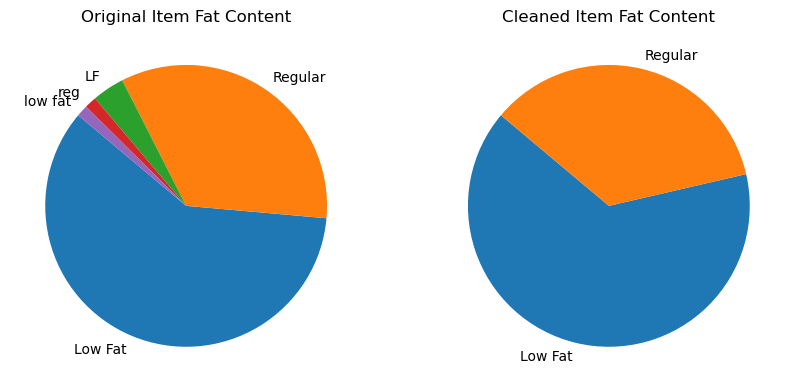

In [15]:
# PLotting a Pie Chart to visualize the work
plt.figure(figsize=(10,10))
plt.subplot(1, 2, 1)
plt.pie(fat_content_original, labels=fat_content_original.index, startangle=140)
plt.title('Original Item Fat Content')
plt.subplot(1, 2, 2)
plt.pie(fat_content_cleaned, labels=fat_content_cleaned.index,  startangle=140)
plt.title('Cleaned Item Fat Content')

plt.show()

In [16]:
# creating a dummy variable for `Item_Fat_Content`
fat = pd.get_dummies(df['Item_Fat_Content'], drop_first= True)
df = pd.concat([df,fat],axis=1)

In [17]:
df.drop(['Item_Fat_Content'], axis=1, inplace =True)
df.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Regular
0,FDA15,9.30,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,False
1,DRC01,5.92,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,True
2,FDN15,17.50,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,False
3,FDX07,19.20,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,True
4,NCD19,8.93,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,False


In [18]:
# checking values for `Outlet_Size`
df['Outlet_Size'].value_counts()

Outlet_Size
Medium    5203
Small     2388
High       932
Name: count, dtype: int64

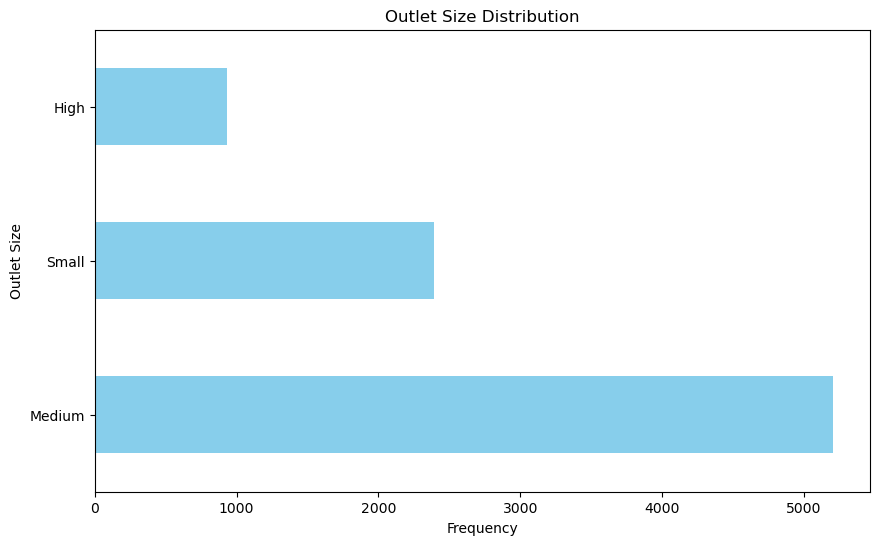

In [19]:
outlet_size = df['Outlet_Size'].value_counts()
# Plotting bar chart for Outlet Size data
plt.figure(figsize=(10, 6))
outlet_size.plot(kind='barh', color='skyblue')
plt.title('Outlet Size Distribution')
plt.xlabel('Frequency')
plt.ylabel('Outlet Size')
plt.show()

#### `Medium` sized Outlets are the most abundant

In [20]:
# creating a dummy variable for `Outlet_Size`
size = pd.get_dummies(df['Outlet_Size'], drop_first= True)
df = pd.concat([df,size],axis=1)
df.drop(['Outlet_Size'], axis=1, inplace =True)

In [21]:
# checking values for `Outlet_Location_Type`
df['Outlet_Location_Type'].value_counts()

Outlet_Location_Type
Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: count, dtype: int64

In [22]:
# creating a dummy variable for `Outlet_Location_Type`
location = pd.get_dummies(df['Outlet_Location_Type'], drop_first= True)
df = pd.concat([df,location],axis=1)
df.drop(['Outlet_Location_Type'], axis=1, inplace =True)

In [23]:
# checking values for `Outlet_Type`
df['Outlet_Type'].value_counts()

Outlet_Type
Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: count, dtype: int64

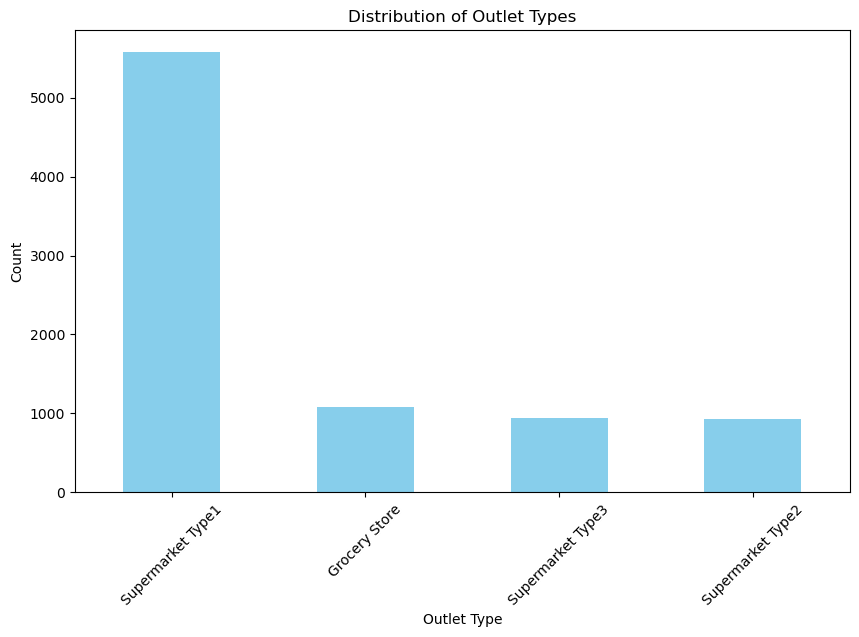

In [24]:
outlet_types = df['Outlet_Type'].value_counts()
# Plotting bar plot for outlet types
plt.figure(figsize=(10, 6))
outlet_types.plot(kind='bar', color='skyblue')
plt.title('Distribution of Outlet Types')
plt.xlabel('Outlet Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


#### `Supermarket Type1` has a mojority in `outlet_type`

In [25]:
# creating a dummy variable for `Outlet_Type`
type = pd.get_dummies(df['Outlet_Type'], drop_first= True)
df = pd.concat([df,type],axis=1)
df.drop(['Outlet_Type'], axis=1, inplace =True)

In [26]:
# checking values for `Item_Type`
df['Item_Type'].value_counts()

Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: count, dtype: int64

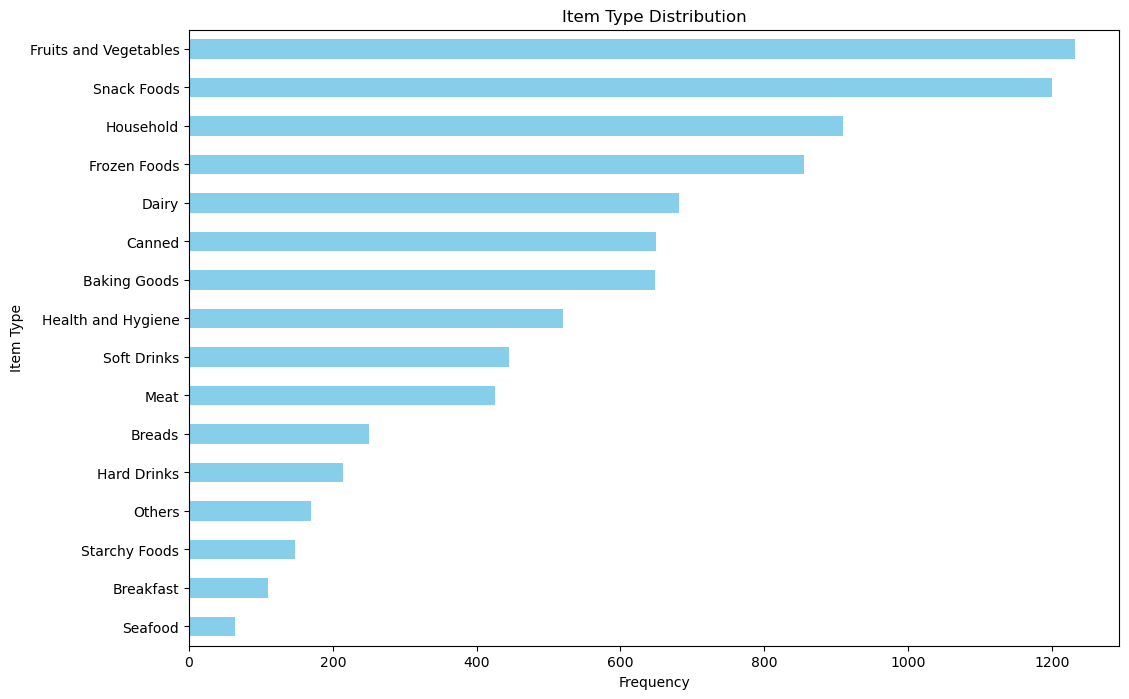

In [27]:
item_type = df['Item_Type'].value_counts()
# Plotting bar chart for Item Type data
plt.figure(figsize=(12, 8))
item_type.sort_values(ascending=True).plot(kind='barh', color='skyblue')
plt.title('Item Type Distribution')
plt.xlabel('Frequency')
plt.ylabel('Item Type')
plt.show()

##### Since there are 16 values for `Item_type` but we can group them into `Food` ,`Non-Consumable` and `Drinks`. 

In [28]:
# Combining all columns into `Food` ,`Non-Consumable` and `Drinks`. 
df['Item_Identifier'].value_counts()
df['Item_Type_Combined'] = df['Item_Identifier'].apply(lambda x: x[0:2])
df['Item_Type_Combined'] = df['Item_Type_Combined'].map({'FD':'Food',
                                                         'NC':'Non-Consumable',
                                                         'DR':'Drinks'})
df['Item_Type_Combined'].value_counts()

Item_Type_Combined
Food              6125
Non-Consumable    1599
Drinks             799
Name: count, dtype: int64

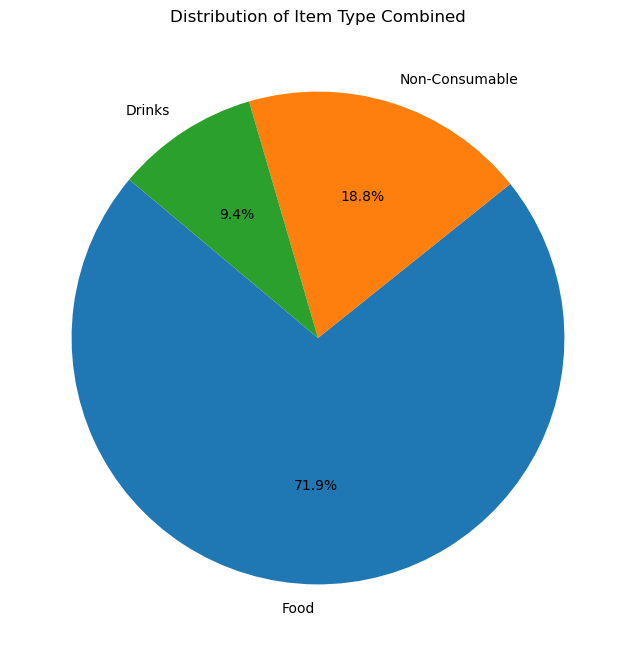

In [29]:
item_type_combined = df['Item_Type_Combined'].value_counts()

# Plotting
plt.figure(figsize=(8, 8))

plt.pie(item_type_combined, labels=item_type_combined.index, autopct='%1.1f%%', startangle=140)

plt.title('Distribution of Item Type Combined')

plt.show()

#### `Food` has the greatest share in `Item_type'


In [30]:
# creating a dummy variable for `Item_Type`
Itype = pd.get_dummies(df['Item_Type_Combined'], drop_first= True)
df = pd.concat([df,Itype],axis=1)
df.drop(['Item_Type_Combined'], axis=1, inplace =True)

In [31]:
df['Outlet_Identifier'].value_counts()

Outlet_Identifier
OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: count, dtype: int64

In [32]:
pd.set_option('display.max_columns', None)
df.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,Regular,Medium,Small,Tier 2,Tier 3,Supermarket Type1,Supermarket Type2,Supermarket Type3,Food,Non-Consumable
0,FDA15,9.30,0.016047,Dairy,249.8092,OUT049,1999,3735.1380,False,True,False,False,False,True,False,False,True,False
1,DRC01,5.92,0.019278,Soft Drinks,48.2692,OUT018,2009,443.4228,True,True,False,False,True,False,True,False,False,False
2,FDN15,17.50,0.016760,Meat,141.6180,OUT049,1999,2097.2700,False,True,False,False,False,True,False,False,True,False
3,FDX07,19.20,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,732.3800,True,True,False,False,True,False,False,False,True,False
4,NCD19,8.93,0.000000,Household,53.8614,OUT013,1987,994.7052,False,False,False,False,True,True,False,False,False,True


In [33]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Item_Outlet_Sales            float64
Regular                         bool
Medium                          bool
Small                           bool
Tier 2                          bool
Tier 3                          bool
Supermarket Type1               bool
Supermarket Type2               bool
Supermarket Type3               bool
Food                            bool
Non-Consumable                  bool
dtype: object

In [34]:
from sklearn.preprocessing import MinMaxScaler

In [35]:
scaler = MinMaxScaler()

In [36]:
 df.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,Regular,Medium,Small,Tier 2,Tier 3,Supermarket Type1,Supermarket Type2,Supermarket Type3,Food,Non-Consumable
0,FDA15,9.30,0.016047,Dairy,249.8092,OUT049,1999,3735.1380,False,True,False,False,False,True,False,False,True,False
1,DRC01,5.92,0.019278,Soft Drinks,48.2692,OUT018,2009,443.4228,True,True,False,False,True,False,True,False,False,False
2,FDN15,17.50,0.016760,Meat,141.6180,OUT049,1999,2097.2700,False,True,False,False,False,True,False,False,True,False
3,FDX07,19.20,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,732.3800,True,True,False,False,True,False,False,False,True,False
4,NCD19,8.93,0.000000,Household,53.8614,OUT013,1987,994.7052,False,False,False,False,True,True,False,False,False,True


In [37]:
# df.describe()

In [38]:
# df1.describe()

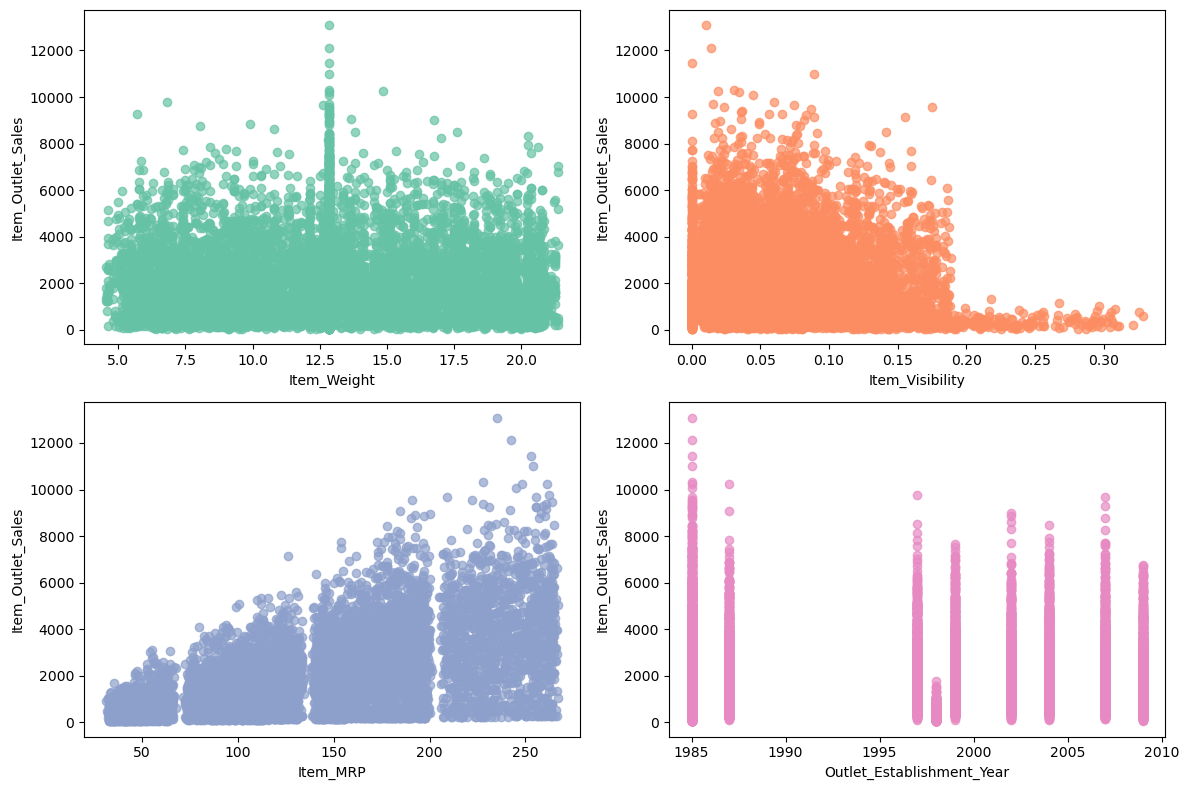

In [39]:
# Defining the features and the target variable
features = ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year']
target_variable = 'Item_Outlet_Sales'

# Creating scatter plots for each feature vs. the target variable
plt.figure(figsize=(12, 8))
colors = sns.color_palette('Set2', len(features))

for i, (feature, color) in enumerate(zip(features, colors), 1):
  plt.subplot(2, 2, i)
  plt.scatter(df[feature], df[target_variable], color=color, alpha=0.7) 
  plt.xlabel(feature)
  plt.ylabel(target_variable)

plt.tight_layout()
plt.show()

OBSERVATIONS

* **Item Weight vs. Item Outlet Sales:**

  There appears to be a **weak positive correlation** between item weight and sales. This indicates that heavier items tend to have slightly higher sales compared to lighter items. However, the scattered nature of the data suggests that weight isn't a strong predictor of sales on its own.

* **Item Visibility vs. Item Outlet Sales:**

  A clearer **positive correlation** is evident between item visibility and sales. This implies that items allocated a larger display area in the store (higher visibility) tend to have higher sales compared to less visible items. The data for this plot is more clustered compared to the weight vs sales plot, signifying a potentially stronger relationship.

* **Item MRP vs. Item Outlet Sales:**

  Discerning the relationship between MRP and sales from this graph is quite challenging. There might be a weak positive correlation, but the data's scattered nature and presence of outliers make it difficult to confirm.

* **Outlet Establishment Year vs. Item Outlet Sales:**

  It's inconclusive from this graph whether a relationship exists between the year a store was established and the sales of a particular item. The data points form a cloud with no apparent pattern.

### DATA AUGMENTATION

#### Splitting the data

In [40]:
# Train Test Split
from sklearn.model_selection import train_test_split

# Define features (X) and target variable (y) for training dataset
X = df.drop(columns=['Item_Outlet_Sales', 'Item_Identifier', 'Item_Type', 'Outlet_Identifier'])
y = df['Item_Outlet_Sales']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [41]:
# # Define the number of augmented samples you want to generate
# num_samples_to_generate = 1000

# # Function to augment data by adding random noise to features
# def augment_data(X, y, num_samples_to_generate):
#     for _ in range(num_samples_to_generate):
#         # Generate random noise with the same shape as features
#         noise = np.random.normal(loc=0, scale=0.1, size=X.shape)
#         # Add noise to features
#         augmented_sample_X = X + noise
#         # Append augmented sample to original data
#         X = np.vstack((X, augmented_sample_X))
#         y = np.append(y, y)  # No change to target variable
#     return X, y

# # Generate augmented data
# X_combined, y_combined = augment_data(X_train, y_train, num_samples_to_generate)

# # Train your model
# model = LinearRegression()
# model.fit(X_combined, y_combined)

# # Evaluate your model on the test set
# r2_val = model.score(X_test, y_test)
# print("R-squared on test set:", r2_val)

## LINEAR MODEL

In [42]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [43]:
y_pred = regressor.predict(X_test)

In [44]:
y_pred

array([1376.0984455 ,  741.34111398,  800.15859582, ...,  828.79898246,
        571.73768162, 1734.23346154])

In [45]:
from sklearn.metrics import r2_score, mean_squared_error
from sklearn import metrics

In [46]:
y_pred_test = regressor.predict(X_test)

In [47]:
r2_val = r2_score(y_test, y_pred_test)
print("R-squared : ", r2_val)

R-squared :  0.5811308737546633


In [48]:
mse_val = mean_squared_error(y_test, y_pred_test)
print("Mean squared error :", mse_val)

Mean squared error : 1138473.746964726


In [49]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

param_grid = {
    'fit_intercept': [True, False],
    'normalize': [True, False],
    'copy_X': [True, False]
}

In [50]:
# grid_search = GridSearchCV(estimator=regressor, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

In [51]:
# grid_search.fit(X_train, y_train)

In [52]:
# best_params = grid_search.best_params_
# print("Best Hyperparameters:", best_params)

In [53]:
# best_estimator = grid_search.best_estimator_

In [54]:
# y_pred = best_estimator.predict(X_test)

In [55]:
# cv_scores = cross_val_score(best_estimator, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
# print("Cross-validation scores:", cv_scores)
# print("Mean cross-validation score:", cv_scores.mean())

In [56]:
# mean_mse_cv = -cv_scores.mean()
# print("Mean cross-validation mean squared error:", mean_mse_cv)


In [57]:
# print("RMSE : %.4g" % np.sqrt(metrics.mean_squared_error(y_train, regressor.predict(X_train))))

In [58]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.linear_model import LinearRegression

# param_grid = {
#     'fit_intercept': [True, False],
#     'normalize': [True, False],
#     'copy_X': [True, False]
# }
# grid_search = GridSearchCV(estimator=LinearRegression(), param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
# grid_search.fit(X_train, y_train)

# best_params = grid_search.best_params_
# print("Best Hyperparameters:", best_params)

# best_estimator = grid_search.best_estimator_
# y_pred_train = best_estimator.predict(X_train)
# mse_train = mean_squared_error(y_train, y_pred_train)
# print("Mean squared error on training data:", mse_train)
# final_model = LinearRegression(**best_params)
# final_model.fit(X_train, y_train)


In [59]:
# # Evaluating the final model on test data
# r2_val_final = final_model.score(X_test, y_test)
# print("R-squared for final model:", r2_val_final)

# y_pred_final = final_model.predict(X_test)
# mse_val_final = mean_squared_error(y_test, y_pred_final)
# print("Mean Squared Error for final model:", mse_val_final)

In [60]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Residual Plot
# residuals = y_test - y_pred_final
# plt.figure(figsize=(14, 6))
# plt.subplot(1, 2, 1)
# sns.residplot(y_pred_final, residuals, lowess=True, line_kws={'color': 'red', 'lw': 1})
# plt.title('Residual Plot')
# plt.xlabel('Predicted Values')
# plt.ylabel('Residuals')

# # Actual vs. Predicted Plot
# plt.subplot(1, 2, 2)
# plt.scatter(y_test, y_pred_final)
# plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
# plt.xlabel('Actual')
# plt.ylabel('Predicted')
# plt.title('Actual vs. Predicted')

# plt.tight_layout() 
# plt.show()


## Model Evaluation: Residuals and Predictions

### Residual Plot

The residuals, scattered around the horizontal zero line, indicate **no consistent pattern of overprediction or underprediction** across the predicted value range. This is a positive sign! The spread of residuals also appears **relatively constant**, suggesting **consistent model variance**. However, with limited data points, a definitive conclusion might be challenging.

### Actual vs. Predicted Plot

The data points generally follow a **diagonal trend**, signifying a **positive correlation** between actual and predicted values. This implies the model captures the **overall direction** of the relationship between features and the target variable.

There's some scatter around the diagonal, indicating the model's predictions aren't perfectly accurate for every data point (common in regression models). A few points deviate significantly, potentially representing **outliers** or observations where predictions are significantly off. Further investigation of these outliers might be beneficial.

**Overall, these plots suggest a reasonably performing model. The positive correlation between predicted and actual values, along with the lack of obvious bias in residuals, is encouraging. However, a more comprehensive evaluation might be necessary depending on your specific requirements.**


### Regularizing the Data using Lasso & Ridge Regression

In [61]:
# from sklearn.linear_model import Lasso
# from sklearn.pipeline import Pipeline
# from sklearn.preprocessing import StandardScaler
# from sklearn.model_selection import GridSearchCV

# # Define the pipeline
# lasso_pipeline = Pipeline([
#     ('scaler', StandardScaler()),
#     ('lasso', Lasso())
# ])

# # Define hyperparameters grid
# lasso_param_grid = {
#     'lasso__alpha': [0.001, 0.01, 0.1, 1, 10, 100]
# }

# # Perform grid search
# lasso_grid_search = GridSearchCV(lasso_pipeline, param_grid=lasso_param_grid, cv=5, scoring='neg_mean_squared_error')
# lasso_grid_search.fit(X_train, y_train)

# # Get the best parameters and best model
# best_lasso_params = lasso_grid_search.best_params_
# best_lasso_model = lasso_grid_search.best_estimator_

# # Evaluate the best model
# lasso_y_pred = best_lasso_model.predict(X_test)
# lasso_r2 = r2_score(y_test, lasso_y_pred)
# lasso_mse = mean_squared_error(y_test, lasso_y_pred)

# print("Lasso Regression R-squared Score:", lasso_r2)
# print("Lasso Regression Mean Squared Error:", lasso_mse)
# print("Best Lasso Model:", best_lasso_model)
# print("Best Lasso Hyperparameters:", best_lasso_params)


In [62]:
# from sklearn.linear_model import Ridge

# # Define the pipeline
# ridge_pipeline = Pipeline([
#     ('scaler', StandardScaler()),
#     ('ridge', Ridge())
# ])

# # Define hyperparameters grid
# ridge_param_grid = {
#     'ridge__alpha': [0.001, 0.01, 0.1, 1, 10, 100]
# }

# # Perform grid search
# ridge_grid_search = GridSearchCV(ridge_pipeline, param_grid=ridge_param_grid, cv=5, scoring='neg_mean_squared_error')
# ridge_grid_search.fit(X_train, y_train)

# # Get the best parameters and best model
# best_ridge_params = ridge_grid_search.best_params_
# best_ridge_model = ridge_grid_search.best_estimator_

# # Evaluate the best model
# ridge_y_pred = best_ridge_model.predict(X_test)
# ridge_r2 = r2_score(y_test, ridge_y_pred)
# ridge_mse = mean_squared_error(y_test, ridge_y_pred)

# print("Ridge Regression R-squared Score:", ridge_r2)
# print("Ridge Regression Mean Squared Error:", ridge_mse)
# print("Best Ridge Model:", best_ridge_model)
# print("Best Ridge Hyperparameters:", best_ridge_params)


## RANDOM FOREST

In [63]:
# # Modelling
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
# from sklearn.model_selection import RandomizedSearchCV, train_test_split
# from scipy.stats import randint

In [64]:
# from sklearn.ensemble import RandomForestRegressor

In [65]:
# # Instantiate Random Forest Regressor
# rf_regressor = RandomForestRegressor(random_state=42)

# rf_regressor.fit(X_train, y_train)

In [66]:
# # Predict on the test set
# y_pred_rf = rf_regressor.predict(X_test)

In [67]:
# # Measure accuracy
# r2_rf = r2_score(y_test, y_pred_rf)
# mse_rf = mean_squared_error(y_test, y_pred_rf)

# print("Random Forest R-squared Score:", r2_rf)
# print("Random Forest Mean Squared Error:", mse_rf)

In [68]:
# from sklearn.ensemble import RandomForestRegressor

# best_rf = RandomForestRegressor(n_estimators=100, max_depth=10)
# best_rf.fit(X_train, y_train)

# y_pred = best_rf.predict(X_test)

In [69]:
# from sklearn.metrics import r2_score, mean_squared_error
# import matplotlib.pyplot as plt

# r2 = r2_score(y_test, y_pred)
# mse = mean_squared_error(y_test, y_pred)

# plt.figure(figsize=(10, 6))
# plt.scatter(y_test, y_pred)
# plt.xlabel('Actual')
# plt.ylabel('Predicted')
# plt.title('Actual vs Predicted Values')
# plt.show()

# print("R-squared score:", r2)


In [70]:
# from sklearn.ensemble import RandomForestRegressor

# # Create the Random Forest Regressor model
# rf_regressor = RandomForestRegressor(random_state=42)

# # Train the model on the training data
# rf_regressor.fit(X_train, y_train)

# # Predict the target variable for the testing data
# y_pred_rf = rf_regressor.predict(X_test)


In [71]:
# from sklearn.model_selection import GridSearchCV

# # Define the grid of hyperparameters to search
# param_grid_rf = {
#     'n_estimators': [100, 200, 300],  
#     'max_depth': [None, 10, 20],  
#     'min_samples_split': [2, 5, 10],  
#     'min_samples_leaf': [1, 2, 4]  
# }

# # Create a grid search object
# grid_search_rf = GridSearchCV(estimator=RandomForestRegressor(random_state=42),
#                                param_grid=param_grid_rf,
#                                cv=5,
#                                scoring='neg_mean_squared_error',
#                                verbose=2,
#                                n_jobs=-1)  # Use all available CPU cores

# # Fit the grid search to the data
# grid_search_rf.fit(X_train, y_train)

# # Get the best parameters
# best_params_rf = grid_search_rf.best_params_
# print("Best Hyperparameters:", best_params_rf)

# # Get the best estimator
# best_estimator_rf = grid_search_rf.best_estimator_

# # Use the best estimator to predict
# y_pred_rf_best = best_estimator_rf.predict(X_test)


In [72]:
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.metrics import r2_score

# # Create the Random Forest model with the best hyperparameters
# best_rf = RandomForestRegressor(n_estimators=300, max_depth=10, min_samples_leaf=2, min_samples_split=10, random_state=42)

# # Train the model on the training data
# best_rf.fit(X_train, y_train)

# # Generate predictions on the test data
# y_pred_rf = best_rf.predict(X_test)

# # Calculate the R-squared score
# r2_rf = r2_score(y_test, y_pred_rf)
# print("R-squared score for Random Forest:", r2_rf)


In [74]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
import joblib
from joblib import dump


# Define the XGBoost regressor
xgb_regressor = xgb.XGBRegressor()

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.001]
}

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=xgb_regressor, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best estimator
best_estimator = grid_search.best_estimator_

# Use the best estimator to predict
y_pred = best_estimator.predict(X_test)

# Evaluate the model
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print("R-squared score after hyperparameter tuning:", r2)
print("Mean squared error after hyperparameter tuning:", mse)
# Save the trained model to a file
joblib.dump(xgb_regressor, 'xgb_model.pkl')

Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
R-squared score after hyperparameter tuning: 0.6073488174858657
Mean squared error after hyperparameter tuning: 1067214.1606950767


['xgb_model.pkl']

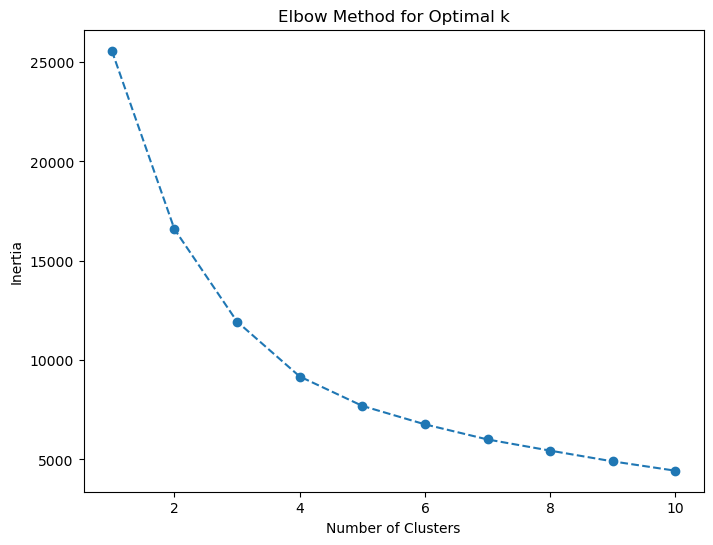

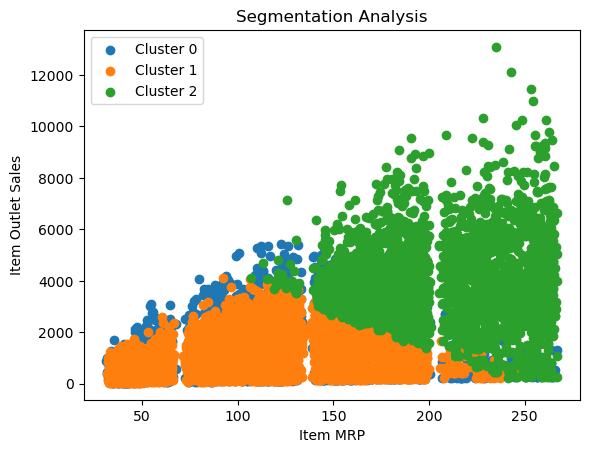

In [75]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('train.csv')

# Select relevant features for segmentation
segmentation_features = ['Item_Outlet_Sales', 'Item_MRP', 'Outlet_Establishment_Year']

# Drop rows with missing values
data.dropna(subset=segmentation_features, inplace=True)

# Standardize the features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[segmentation_features])

# Determine the optimal number of clusters using the Elbow Method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

# Based on the Elbow Method, select the optimal number of clusters
optimal_k = 3

# Perform K-means clustering
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
data['Cluster'] = kmeans.fit_predict(scaled_data)

# Visualize the clusters
for cluster in sorted(data['Cluster'].unique()):
    cluster_data = data[data['Cluster'] == cluster]
    plt.scatter(cluster_data['Item_MRP'], cluster_data['Item_Outlet_Sales'], label=f'Cluster {cluster}')

plt.xlabel('Item MRP')
plt.ylabel('Item Outlet Sales')
plt.title('Segmentation Analysis')
plt.legend()
plt.show()


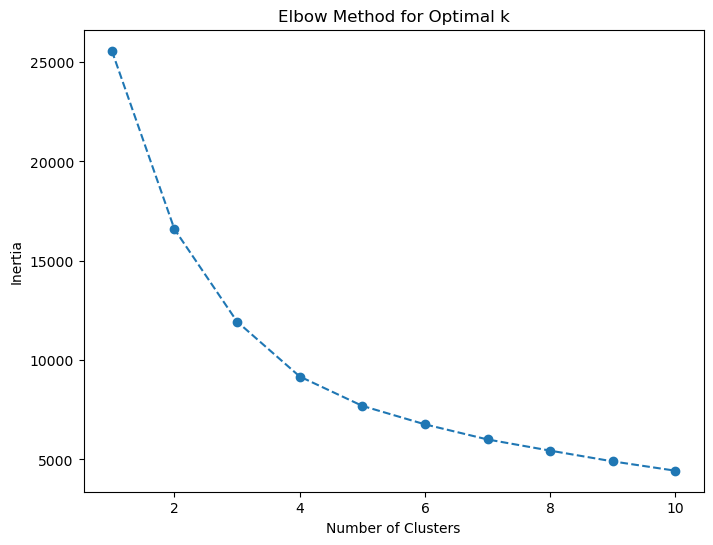

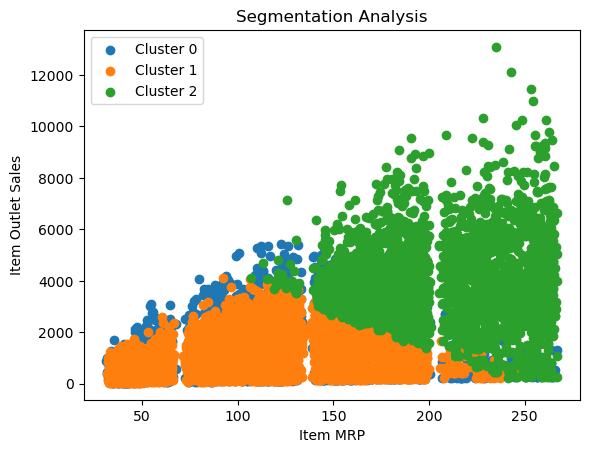

In [76]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load the dataset
train_data = pd.read_csv('train.csv')

# Select relevant features for segmentation
segmentation_features = ['Item_MRP', 'Outlet_Establishment_Year', 'Item_Outlet_Sales']

# Drop rows with missing values in selected features
train_data.dropna(subset=segmentation_features, inplace=True)

# Standardize the features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(train_data[segmentation_features])

# Determine the optimal number of clusters using the Elbow Method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

# Based on the Elbow Method, select the optimal number of clusters
optimal_k = 3

# Perform K-means clustering
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
train_data['Cluster'] = kmeans.fit_predict(scaled_data)

# Visualize the clusters
for cluster in sorted(train_data['Cluster'].unique()):
    cluster_data = train_data[train_data['Cluster'] == cluster]
    plt.scatter(cluster_data['Item_MRP'], cluster_data['Item_Outlet_Sales'], label=f'Cluster {cluster}')

plt.xlabel('Item MRP')
plt.ylabel('Item Outlet Sales')
plt.title('Segmentation Analysis')
plt.legend()
plt.show()


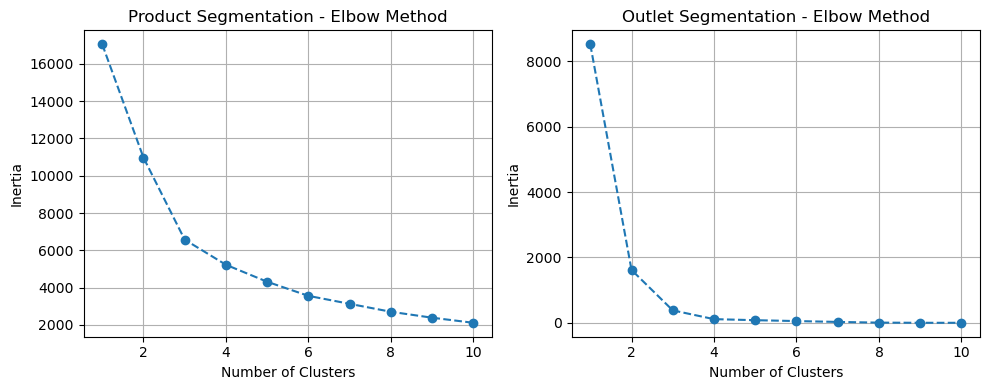

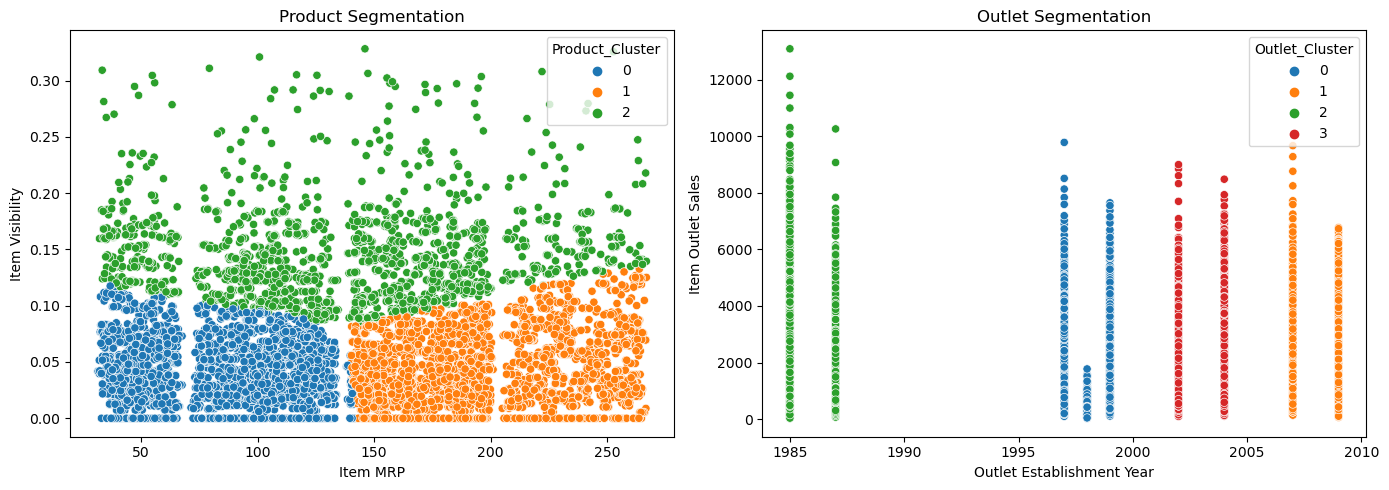

In [77]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
train_data = pd.read_csv('train.csv')

# Select relevant features for segmentation
product_segmentation_features = ['Item_MRP', 'Item_Visibility']
outlet_segmentation_features = ['Outlet_Establishment_Year']

# Drop rows with missing values in selected features
train_data.dropna(subset=product_segmentation_features + outlet_segmentation_features, inplace=True)

# Standardize the features
scaler = StandardScaler()
scaled_product_data = scaler.fit_transform(train_data[product_segmentation_features])
scaled_outlet_data = scaler.fit_transform(train_data[outlet_segmentation_features])

# Determine the optimal number of clusters using the Elbow Method for product segmentation
product_inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_product_data)
    product_inertia.append(kmeans.inertia_)

# Determine the optimal number of clusters using the Elbow Method for outlet segmentation
outlet_inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_outlet_data)
    outlet_inertia.append(kmeans.inertia_)

# Plot the Elbow Method for product segmentation
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(range(1, 11), product_inertia, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Product Segmentation - Elbow Method')
plt.grid(True)

# Plot the Elbow Method for outlet segmentation
plt.subplot(1, 2, 2)
plt.plot(range(1, 11), outlet_inertia, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Outlet Segmentation - Elbow Method')
plt.grid(True)

plt.tight_layout()
plt.show()

# Based on the Elbow Method, select the optimal number of clusters for product and outlet segmentation
optimal_k_product = 3
optimal_k_outlet = 4

# Perform K-means clustering for product segmentation
kmeans_product = KMeans(n_clusters=optimal_k_product, random_state=42)
train_data['Product_Cluster'] = kmeans_product.fit_predict(scaled_product_data)

# Perform K-means clustering for outlet segmentation
kmeans_outlet = KMeans(n_clusters=optimal_k_outlet, random_state=42)
train_data['Outlet_Cluster'] = kmeans_outlet.fit_predict(scaled_outlet_data)

# Visualize the segmented data
plt.figure(figsize=(14, 5))

# Product segmentation visualization
plt.subplot(1, 2, 1)
sns.scatterplot(x='Item_MRP', y='Item_Visibility', hue='Product_Cluster', data=train_data, palette='tab10')
plt.xlabel('Item MRP')
plt.ylabel('Item Visibility')
plt.title('Product Segmentation')

# Outlet segmentation visualization
plt.subplot(1, 2, 2)
sns.scatterplot(x='Outlet_Establishment_Year', y='Item_Outlet_Sales', hue='Outlet_Cluster', data=train_data, palette='tab10')
plt.xlabel('Outlet Establishment Year')
plt.ylabel('Item Outlet Sales')
plt.title('Outlet Segmentation')

plt.tight_layout()
plt.show()


In [ ]:
import joblib
import sys
import json

# Load the saved XGBoost model
model = joblib.load('best_model.pkl')

# Function to make predictions
def predict(data):
    # Perform predictions using the loaded model
    predictions = model.predict(data)
    return predictions.tolist()  # Convert predictions to a list

# Main function to receive data and perform predictions
def main():
    try:
        # Read data from stdin
        input_data = sys.stdin.readline()
        # Log the input data
        print('Received input data:', input_data)
        # Parse JSON data
        input_data = json.loads(input_data)
        # Make predictions
        predictions = predict(input_data)
        # Print predictions to stdout
        print('Predictions:', predictions)
        print(json.dumps(predictions))
        sys.stdout.flush()
    except Exception as e:
        # Print any errors to stderr
        print(e, file=sys.stderr)
        sys.stderr.flush()

if __name__ == "__main__":
    main()


In [78]:
import streamlit as st

# CSS styles
st.markdown(
    """
    <style>
    body {
        background-image: linear-gradient(to left, rgba(233,100,67, 0.6), rgba(159, 272, 230, 0)), url('https://your-image-url.com');
        background-size: 100%;
        background-repeat: no-repeat;
        background-attachment: fixed; 
        font-family: 'Lora', serif;
        display: flex;
        align-items: center;
        justify-content: center;
        min-height: 100vh;
        width: 100vw;
        margin: 0;
        padding: 0;
        box-sizing: border-box;
    }
    
    .container {
        background-color: #fff;
        border-radius: 10px;
        overflow: hidden;
        width: calc(100vw - 65vw);
        max-width: 100%;
    }
    
    .header {
        background: linear-gradient(to left, #2c3e50, #fd746c);
        padding: 30px 0;
    }
    
    .header h2, .header h3 {
        color: #fff;
        font-family: 'Lora', serif;
        font-size: 24px;
        text-transform: uppercase;
        text-align: center;
    }
    
    .form {
        padding: 40px;
    }
    
    .form-control {
        margin-bottom: 30px;
        position: relative;
    }
    
    .form-control label {
        display: inline-block;
        margin-bottom: 5px;
    }
    
    .form-control input {
        width: 100%;
        border: 2px solid #f0f0f0;
        border-radius: 5px;
        display: block;
        font-family: 'Lora', serif;
        font-size: 14px;
        padding: 12px;
    }
    
    .form-control input:focus {
        outline: 0;
        border-color: #777;
    }
    
    .form .btn {
        background: linear-gradient(to left, #2c3e50, #fd746c);
        border-radius: 6px;
        border: none;
        outline: none;
        color: #fff;
        display: block;
        font-family: 'Lora', serif;
        font-size: 16px;
        padding: 15px 0;
        margin-top: 20px;
        width: 100%;
        font-weight: bold;
        text-transform: uppercase;
        transition: all 1s ease;
        cursor: pointer;
    }
    
    .form .btn:hover {
        background: linear-gradient(to right, rgba(233,100,67, 0.6), rgba(159, 272, 230, 0));
    }
    </style>
    """,
    unsafe_allow_html=True
)

# Streamlit form
st.write('<div class="container">', unsafe_allow_html=True)
st.write('<div class="header">')
st.write('<h2>BigMart Sales Prediction</h2>')
st.write('<h3>Make a Prediction</h3>')

st.write('<form class="form" id="form">')
st.write('<div class="form-control">')
st.write('<label for="itemWeight">Item Weight:</label>')
item_weight = st.text_input('Enter weight of item', key='item_weight')
st.write('</div>')

st.write('<div class="form-control">')
st.write('<label for="itemVisibility">Item Visibility:</label>')
item_visibility = st.text_input('Enter a number for item visibility', key='item_visibility')
st.write('</div>')

st.write('<div class="form-control">')
st.write('<label for="itemMRP">Item MRP:</label>')
item_mrp = st.text_input('Enter MRP of item', key='item_mrp')
st.write('</div>')

st.write('<div class="form-control">')
st.write('<label for="outletYear">Outlet Establishment Year:</label>')
outlet_year = st.text_input('Enter Outlet Establishment Year', key='outlet_year')
st.write('</div>')

st.write('<input type="submit" value="Submit" class="btn">')
st.write('</form>')

st.write('<div id="result" style="display: none;">')
st.write('<p id="predictionResult"></p>')
st.write('</div>')

st.write('</div>')
st.write('</div>')


2024-05-02 03:36:33.879 
  command:

    streamlit run C:\Users\risha\anaconda3\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
